# Feedforward Neural Network
Feedforward neural network is a simple form of artificial neural network in which the computation units pass the values gradually toward the output, combining them in a highly efficient manner to lead to improved results. The computation units in a feedforward neural network propagate the information in the forward direction (there are no cycles or backward links), through the hidden nodes and then to the output nodes. A simple example of a feedforward neural network is shown in

![simple-ff-nn](images/simple-ff-nn.png)

## Training Neural Networks
Backpropagation is the process for training neural networks. Backpropagation is based loosely on techniques that are being used since the 1960s, though this was thoroughly defined in 1986 by Rumelhart, Hinton, and Williams, which was followed by Yann LeCun’s work in 1987. During this time period, there were several promising works on neural networks, which form the basis of the field of deep learning today, though they couldn’t catch much attention in the general public due to limited computational infrastructure of that time. Later, around the 2010s, the cost of computer processors and graphics processors (GPUs) declined sharply, thus giving rise to the refinement of decade-old models and the creation of novel neural network architectures, leading to their use in speech recognition, computer vision, and natural language processing.

### Gradient Descent
Training of neural networks requires a process called gradient descent, an iterative algorithm that is used to find the minimum (or maximum) value of a loss or a cost function. Imagine a regression problem in which a continuous output variable is determined based on a continuous input variable. In most practical cases, the predicted output, shown as a line in below figure, will not be exactly the same as the actual (expected) output. This difference is called errors, or residuals, and the learning algorithm aims to minimize the total residuals or some other aggregation of residuals.

![errors-lr-model](images/errors-lr-model.png)

The learning process tends to learn the parameters of equation of a line in the form of `y = w0 + w1x1 + w2x2 + ⋯`. To simplify our example, we will stick to only one variable, thus leading to y = w0 + w1x1. One of the approaches used to solve such problems is gradient descent. In this example, we define an optimization function, here, a cost function, which shows how far the model’s results are with respect to the actual values in the training data. In linear regression, we can use mean squared error, which is the average of squares of differences in the values predicted by the model and the actual values.

\begin{equation}
J=\frac{1}{n} \sum_{\mathrm{k}=1}^n\left(\hat{\mathrm{y}}_k-y_k\right)^2
\end{equation}

The idea behind gradient descent is that the well-trained model should be the one in which the cost function is minimized. Each possible set of slopes (w0, w1,…) will produce a different model. Below figure shows the change in cost with respect to a slope, say, w1.

![gradiant-descent-algo](images/gradiant-descent-algo.png)

Our aim is to find a slope that produces the minimum cost. You can see the corresponding point at the lowest point of curve in the figure. Gradient descent algorithm begins with a randomly initialized value, and based on the slope of the cost at the point given by the partial derivative with respect to the slope, the algorithm changes:

fun

which resolve to

func

This denotes the update in the value of m that should ideally lead toward a model with low cost. This process is the basis of backprop algorithm, and through the right choice of the loss function, we can train neural networks for much more complex problems.

### Backpropagation
In a multilayer network, this method can be directly applied at the final layer where we can find the difference in the actual (or target) and the predicted value; however, this can’t be applied in the hidden layers because we don’t have any target values to compare. To continue updating the weights on all the individual cells of the neural network, we calculate the error in the final layer and propagate that error back from the last layer to the first layer. This process is called backpropagation.

Let’s consider a simplified neural network with one hidden layer as shown in below figure. We have only three nodes; the first one represents the input, the second is a hidden layer that performs computation on the input based on weight w1 and bias b1, and the third is an output layer, which also performs computation on the output from the hidden layer based on weight w1 and bias b1.

![simplified-nn-with-hidden-layer](images/simplified-nn-with-hidden-layer.png)

Here, the first node accepts the input and forwards it to the second node, the hidden layer. Hidden layer applies the weight w1 to the input and adds bias b1, thus producing `w1.xk+b1`, which is then applied with the activation function f. Thus, the output of hidden layer is `f(w1.xk+b1)`.

The output of hidden layer is being forwarded as the input of the third unit. This will be multiplied by w2 and added to bias b2. Thus, the input of the third unit is `w2.f(w1.xk+b1) + b2`.

When the activation function g is applied to it, it produces the output `g(w2.f(w1xk+b1) + b2)`, which is the predicted output. This process of forward propagation happens in each iteration during the training phase. Once we know the predicted value for all the items in the training dataset, we can find the loss or the cost function. For this explanation, let’s continue the same loss function we defined in the previous section.

\begin{equation}
J=\frac{1}{n} \sum_{\mathrm{k}=1}^n\left(\hat{\mathrm{y}}_k-y_k\right)^2
\end{equation}

Where
func

We know that we can compute the derivative of loss function with respect to w1 to update w1 in order to reduce the overall loss in the next iteration.

func

This leads to another quantity that is resolved using chain rule as follows:

func

OR

func

We can find partial derivative with respect to w2 as

func

func

## Loss Functions
In the previous explanation, we used a loss function called mean squared error (MSE). Due to its nature, this kind of loss function is suitable for regression problems where the output is a continuous variable. There are several other common loss functions that you can use depending on the problem in hand.

### Mean Squared Error (MSE)
This averages the sum of squares of the error between actual value and predicted value. This penalizes the model for large errors and ignores small errors. This is also called L2 loss. For two values, y and ŷ, usually expected output and predicted output, the error component for each training sample is given by

func

### Mean Absolute Error
Instead of considering the squares, we can simply look at the absolute sum of squares and take a mean across the dataset. This is also called L1 loss, and it is robust to outliers.

func

### Negative Log Likelihood Loss
In simple classification problems, negative log likelihood loss is an efficient option that encourages the models in which the prediction is made correctly with high probabilities and penalizes it when it predicts the correct class with smaller probabilities.

func

### Cross Entropy Loss
This is a suitable function to use in classification problems. It penalizes the model for producing wrong output with high probability. It is one of the mostly used loss functions when training a classification problem with C classes.

func

### Hinge Loss
In problems where we want to learn nonlinear embeddings, hinge loss measures the loss given an input tensor x and a label tensor y (containing 1 or -1). This is usually used for measuring whether two inputs are similar or dissimilar.

func

## ANN for Regression
Let’s use PyTorch to create a simple neural network for a regression problem. Let’s begin with creating a simple dataset with one independent variable (X) and a dependent variable (y), where there might be a linear-like relationship between X and y. We will create tensors of shape [20,1], thus representing 20 inputs and 20 output values. The output plot is shown below:

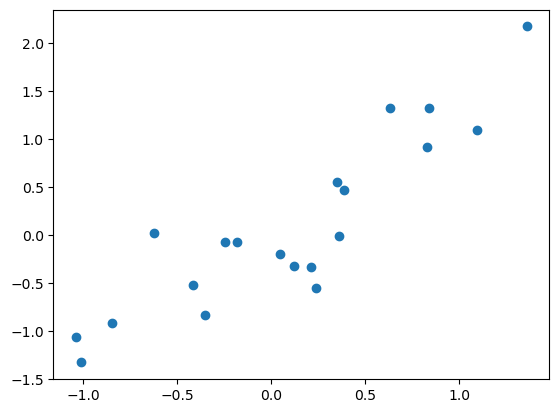

In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot

x = torch.randn(20,1)
y = x + torch.randn(20,1)/2

pyplot.scatter(x,y)
pyplot.show()

The data is ready. This model is a simple sequential model, which will have an input layer, followed by an activation function, and another output layer.

In [2]:
model = nn.Sequential(
            nn.Linear(1,1),
            nn.ReLU(),
            nn.Linear(1,1)
        )

Activation function is the function f that is applied to the weighted inputs f (wixi). ReLU, or Rectified Linear Unit, is a simple function that produces an output of 0 for any negative inputs and produces the unchanged input value for positive inputs. We will discuss about ReLU and other activation functions later.

Because we have only one input variable, we expect to learn two weights, w1 and b. Due to ease of implementation, we refer to b as w0. For the input linear layer and the output linear layer, there will be two sets of weights each, thus a total of four weights initialized randomly, that we need to learn during training. Let’s see the model parameters to understand the quantities that will be learned.

In [3]:
list(model.parameters())

[Parameter containing:
 tensor([[0.0420]], requires_grad=True),
 Parameter containing:
 tensor([0.8526], requires_grad=True),
 Parameter containing:
 tensor([[-0.9220]], requires_grad=True),
 Parameter containing:
 tensor([0.6401], requires_grad=True)]

We can now begin the process to learn the weights that minimizes the loss function using the method defined as the optimizer. However, remember that PyTorch requires the data to be in the form of a tensor. Let’s quickly `(1)` scale the data in the 0–1 range and `(2)` convert to tensor.

In [4]:
x = (x-x.min()) / (x.max()-x.min())

y = (y-y.min()) / (y.max()-y.min())

We now need to initialize mean squared error (MSE) loss function and an optimizer, which will use stochastic gradient descent for updating the weights.

In [5]:
lossfunction = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

While initializing the optimizer, we have defined a learning rate of 0.05. This affects how quickly (or slowly) the weights are updated. The learning process requires multiple iterations in three steps:
1. Forward propagation: Using the current set of weights, compute
the output.
2. Computation of losses: Compare outputs with the actual values.
3. Backpropagation: Use the losses for updating weights.

Here, we use a for loop to iterate over 50 epochs. In this process, we will also keep track of losses so that we can later visualize how errors change over epochs.

In [6]:
loss_history = []

for epoch in range(50):
    pred = model(x)
    loss = lossfunction(pred, y)
    loss_history.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

After 50 iterations, we expect the losses to be low enough to produce a decent result. Let’s visualize how the losses changed by plotting a chart of loss_history. We must remember that the loss object produced by lossfunction() will also contain data as a tensor, and we need to detach it so that Matplotlib can process it.

[]

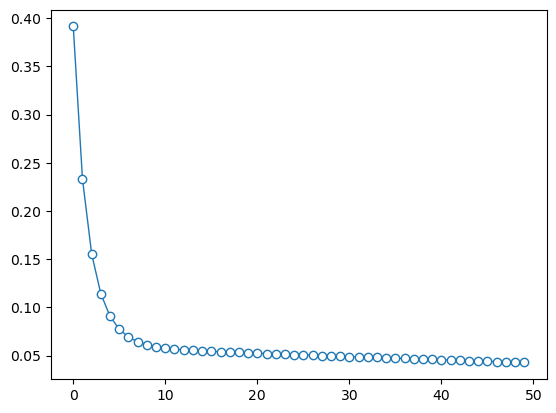

In [7]:
import matplotlib.pyplot as plt

plt.plot([x.detach() for x in loss_history], 'o-', markerfacecolor='w', linewidth=1)
plt.plot()

It is evident from above figure that the losses decrease rapidly till the `sixth` epoch, after which the errors were so low that the gradient reduced, and the further changes were slower – till somewhere around the 30th epoch, after which the loss stayed the same and the change in weights was minimal.

Let’s look at the results produced by the system. The result thus produced is shown below:

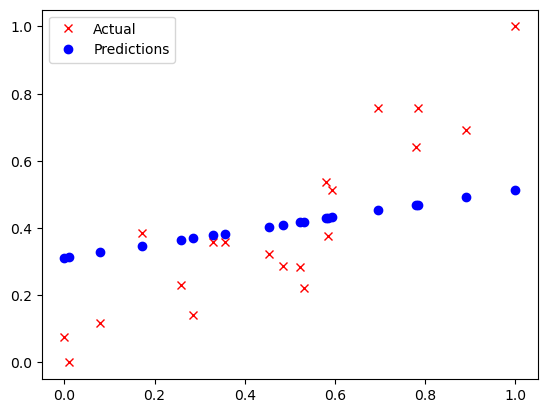

In [8]:
predictions = model(x)

plt.plot(x, y, 'rx', label="Actual")
plt.plot(x, predictions.detach(), 'bo', label="Predictions")
plt.legend()
plt.show()

This overly simple one-layer neural network might not always give best results for problems in which you can use fairly straightforward statistical solutions. It is possible that despite the graph showing evident reduction in losses, the final regression line might not be as closely fitting as you might expect. You can define the model and train it multiple times to see the difference due to random initialization.

## Activation Functions
Each computation unit in a neural network accepts the input, multiplies weights, adds the bias, and applies an activation function to it before forwarding it to the next layer. This becomes input for the computation units in the next layer. In this example, we used `Rectified Linear Unit (ReLU)`, which returns x, for an input x if x>0; otherwise, it returns 0. Thus, if a unit’s weighted computation yields a negative value, ReLU will make it as 0, which will be the input to the next layer. If the input is zero or negative, the derivative of activation function is 0, otherwise, 1.

There are many activation functions that have been defined. Here are some of the activation functions that you might often see being used.

### ReLU Activation Function
Rectified Linear Unit is a simple and efficient function that enables the input as it is, if it is positive and doesn’t activate for the negative input; thus, it rectifies the incoming signal. It is computationally fast, nonlinear, and differentiable. It is defined as

func

However, because in case of negative inputs the neuron doesn’t affect the output at all, its contribution to the output becomes zero and thus doesn’t learn during backpropagation. This is solved by a variation of ReLU called Leaky ReLU.

![relu-and-leaky-relu](images/relu-and-leaky-relu.png)

Leaky ReLU produces a relatively small output for negative signals, which can be configured by changing the negative_slope.

### Sigmoid Activation Function
Sigmoid function produces an output between 0 and 1, with output values close to 0 for a negative input and close to 1 for a positive input. The output is 0.5 for input of 0. You can see the graph for sigmoid activation function in the below figure. This function is highly suitable for classification problems, and if used in the output layer, the output value that is between 0 and 1 can be interpreted as a probability.

func

However, sigmoid is computationally more expensive. If the input values are too high or too small, it can cause the neural network to stop learning. This problem is called vanishing gradient problem.

### 
Tanh function is similar to sigmoid function but produces an output between -1 and 1, with output values close to -1 for a negative input and close to 1 for a positive input. The function crosses the origin at (0,0). The graph for tanh function is shown in the below figure. You can see
that though the two functions look similar, tanh function is significantly different.

func 

Despite the similar shape, the gradients of tanh function are much stronger than sigmoid function. It is also used for layers which we wish to pass the negative inputs as negative outputs.

![sgmoid-tabh](images/sgmoid-tabh.png)

If a very negative input is provided to sigmoid function, the output value will be close to zero, and thus, the weights will be updated very slowly during backpropagation. Tanh thus improves the performance of the network in such situations.